In [2]:
import numpy as np
import librosa 
import matplotlib.pyplot as plt

In [66]:
rir, fs = librosa.load('rir.wav', sr=None)
rir = rir / np.max(abs(rir))
def bhaskara(a, b, c):
    r = b**2 - 4*a*c
    if r > 0:
        num_roots = 2
        x1 = (((-b) + np.sqrt(r))/(2*a))
        x2 = (((-b) - np.sqrt(r))/(2*a))
        return np.max((x1, x2))
    elif r == 0:
        num_roots = 1
        x = (-b) / 2*a
        return x
    else:
        num_roots = 0
        return

In [67]:
t_d = np.argmax(rir) # direct path                                                     
t_o = int((0.0025) * fs) #tolerance window in samples                      
init_idx = t_d - t_o
final_idx = t_d + t_o + 1

if init_idx < 0:
    init_idx = 0
if final_idx > len(rir)-1:
    final_idx = len(rir)-1

early= rir[init_idx:final_idx]
late = rir[final_idx:]

In [68]:
DRR_buscado = -15
#Busco el coeficiente para llegar a la DRR deseada
w = np.hamming((t_o*2)+1) #ventana de hamming de 5ms
a = np.sum((w**2) * (early**2))
b = 2 * np.sum((1-w)*w*(early**2))
c = np.sum(((1-w)**2)*(early**2))-(np.power(10,DRR_buscado/10)*np.sum(late**2))
alpha = bhaskara(a, b, c)

#Defino la nueva parte early
new_early = (alpha * w * early) + ((1 - w)*early)
if np.max(abs(new_early))<np.max(abs(late)):
    print("El nivel deseado es demasiado bajo")
    new_early = early



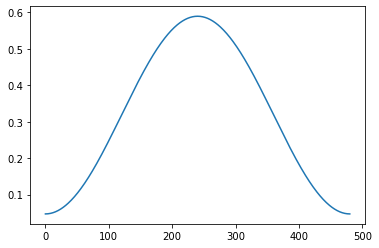

In [69]:
plt.plot(alpha*w)

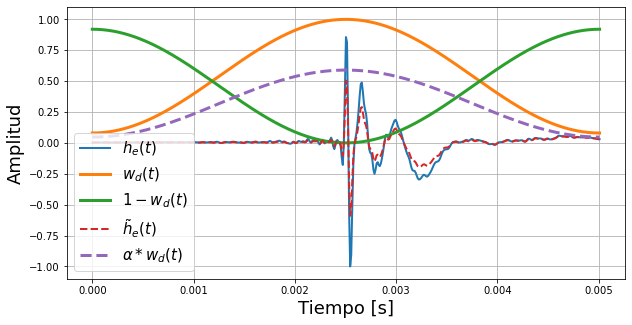

In [99]:
t = np.linspace(0, len(early)/fs, len(early))
plt.figure(1, figsize=(10,5))
plt.plot(t,early, linewidth=2.0 ,label=r'$h_{e}(t)$')
plt.plot(t,w, '-', linewidth=3.0, label=r'$w_{d}(t)$')
plt.plot(t,1-w, '-', linewidth=3.0, label=r'$1-w_{d}(t)$')
plt.plot(t,new_early, '--', linewidth=2.0, label = r'$\tilde{h}_{e}(t)$')
plt.plot(t,alpha*w, '--', linewidth=3.0, label = r'$\alpha * w_{d}(t)$')
plt.grid()
plt.xlabel('Tiempo [s]', size=18)
plt.ylabel('Amplitud', size=18)
plt.legend(prop={'size': 15})
plt.savefig('drr_aug.png')